##**Trabalho Prático 2**

##Bárbara Faria (A85774), Bruna Araújo (A84408) e Tiago Lima (A85126)

##1. Sistema de Tráfego

1. Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido.

>O grafo tem de ser ligado o que significa que entre cada par de nodos $\langle n_1,n_2 \rangle$ tem de existir um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$.

In [ ]:
import networkx as nx 

In [ ]:
!pip install ortools

##Resolução dos Exercícios

### **a.** Gerar aleatoriamente um tal grafo com  $N=32$ nodos.  Cada nodo tem um número aleatório de descendentes no intervalo $\,1..3\,$  cujos destinos são distintos entre si do nodo origem.

####Análise do problema

Começamos por definir um grafo orientado com 32 nodos. De seguida e aleatoriamente vamos atribuir um número de descendentes e os própios descendentes a cada vértice (nodo). 

Sabendo que cada nodo tem entre 1 e 3 descendentes e com o  auxílio da função *random.choices()* guardamos no *rand_edge* o número aleatório que a função utilizada retorna, que será o número de arestas que cada nodo terá. O *rand_nodes* vai atribuir o resultado do *rand_edge* a um nodo aleátorio. 

Seguidamente retiramos as arestas bidirecionais e os lacetes pois não são precisos para a elaboração do grafo.

Por fim, precisamos de ter a certeza de que o grafo é ligado. Para isso, usamos a função *is_strongly_connected* do NetworkX. Se não for ligado, repetimos o processo até obtermos um que o seja.

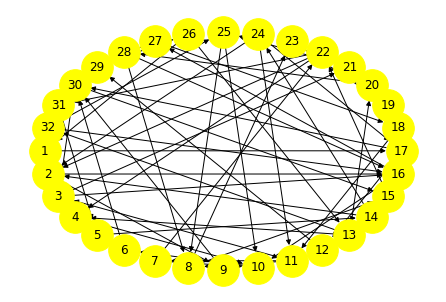

In [ ]:
import networkx as nx
import random

#Grafo Orienado com 32 vértices
G = nx.DiGraph()
G.add_nodes_from(range(1,33))

valid = 0
n_valid = 0
while(not valid):
  G.clear()
  G.add_nodes_from(range(1,33))

  for o in G.nodes():
    #Atribuir número de descendentes (e os próprios descendentes) a cada vértice, aleatoriamente
    rand_edge = random.choices(range(1,4), k=1)
    rand_nodes = random.choices(range(1,33), k=rand_edge[0])

    #Não nos interessam lacetes, nem arestas bi-direcionais
    for d in rand_nodes:
      if d != o and ((d,o) not in G.edges):
        G.add_edge(o,d)
    
  valid = (nx.is_strongly_connected(G))
  if (valid == False):
    n_valid += 1

#print("Quantas vezes inválido?\n",n_valid)
#print("Descendentes:",G.out_degree())

nx.draw_shell(G, with_labels=True, node_size = 1000, node_color = "yellow")




###**b.** Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

####Análise do problema

Primeiramente vamos guardar no g_old as arestas do grafo gerado anteriormente, denominado por grafo G. Vamos, ainda, gerar uma cópia desse mesmo grafo chamada de G_novo. 

Seguidamente vamos percorrer todas as arestas do grafo G e vamos removê-las uma a uma,verificando se o grafo se mantém ligado. Se o grafo continuar a ser ligado, incrementamos a variável c e se verificarmos que não está ligado adicionamos de novo essa aresta.

Arestas removidas:  18


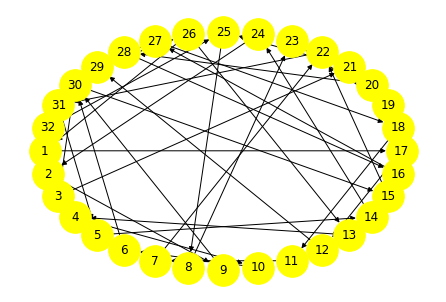

In [ ]:
#Lista que guarda todas as arestas do grafo G gerado
g_old=list(G.edges())

#Novo grafo (cópia de G)
G_novo=G.copy()

#Contador de arestas removidas
c=0 

#Vamos a cada aresta do grafo gerado e removemos arestas uma a uma. 
#Vemos em cada ocasião se o grafo se mantem ligado. 
#Se sim contamos uma remoção. se não temos que voltar a adicioná-la.
for (o,d) in g_old:
  G_novo.remove_edge(o,d)
  if (nx.is_strongly_connected(G_novo)):
    c+=1
  else:
    G_novo.add_edge(o,d)

print('Arestas removidas: ', c)
#print(G_novo.edges())

nx.draw_shell(G_novo, with_labels=True, node_size = 1000, node_color = "yellow")
